# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [336]:
import os
current_dir = os.getcwd()
current_dir

'c:\\'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [337]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [338]:
current_dir = os.getcwd()
current_dir

'c:\\'

# Section 1

Section 1 content

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Path to the ZIP file
zip_path = r"C:\Users\seebi\downloads\VSCODE_Projects\March_Team_Project\Source_Data\pollution_us_2000_2016.csv.zip"

# Read CSV directly from ZIP
with zipfile.ZipFile(zip_path) as z:
    with z.open("pollution_us_2000_2016.csv") as file:
        pollution = pd.read_csv(file)

# Display the first few rows
print(pollution.head())


   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [340]:
# Check for missing values in each column
print(pollution.isnull().sum())


Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64


In [341]:
# Check correlation of missing values
missing_corr = pollution.isnull().astype(int).corr()
print(missing_corr["SO2 AQI"])
print(missing_corr["CO AQI"])

Unnamed: 0                NaN
State Code                NaN
County Code               NaN
Site Num                  NaN
Address                   NaN
State                     NaN
County                    NaN
City                      NaN
Date Local                NaN
NO2 Units                 NaN
NO2 Mean                  NaN
NO2 1st Max Value         NaN
NO2 1st Max Hour          NaN
NO2 AQI                   NaN
O3 Units                  NaN
O3 Mean                   NaN
O3 1st Max Value          NaN
O3 1st Max Hour           NaN
O3 AQI                    NaN
SO2 Units                 NaN
SO2 Mean                  NaN
SO2 1st Max Value         NaN
SO2 1st Max Hour          NaN
SO2 AQI              1.000000
CO Units                  NaN
CO Mean                   NaN
CO 1st Max Value          NaN
CO 1st Max Hour           NaN
CO AQI              -0.000011
Name: SO2 AQI, dtype: float64
Unnamed: 0                NaN
State Code                NaN
County Code               NaN
Site Num  

In [342]:
missing_by_state = pollution[pollution["SO2 AQI"].isnull()].groupby("State").size()
print(missing_by_state)


State
Alabama                   1562
Alaska                     987
Arizona                  34915
Arkansas                 17666
California              287910
Colorado                 17590
Connecticut              14964
Country Of Mexico         4752
Delaware                  1815
District Of Columbia     12835
Florida                  12959
Georgia                   3861
Hawaii                   10116
Idaho                      912
Illinois                 25056
Indiana                   6962
Iowa                     12921
Kansas                   15737
Kentucky                  7342
Louisiana                11936
Maine                    11808
Maryland                 11766
Massachusetts            10784
Michigan                  4091
Minnesota                 1747
Missouri                  9888
Nevada                    4849
New Hampshire             4647
New Jersey               13364
New Mexico                3557
New York                 35238
North Carolina           18563
No

In [343]:
pollution["Year"] = pd.to_datetime(pollution["Date Local"]).dt.year
missing_by_year = pollution[pollution["SO2 AQI"].isnull()].groupby("Year").size()
print(missing_by_year)


Year
2000    45818
2001    44730
2002    46763
2003    43191
2004    41053
2005    42605
2006    50411
2007    57676
2008    59758
2009    52009
2010    51971
2011    64597
2012    64057
2013    67259
2014    65741
2015    62973
2016    12295
dtype: int64


In [344]:
# Total number of rows per state
total_by_state = pollution["State"].value_counts()

# Missing values per state for SO2 & CO
missing_so2 = pollution["SO2 AQI"].isnull().groupby(pollution["State"]).sum()
missing_co = pollution["CO AQI"].isnull().groupby(pollution["State"]).sum()

# Convert to percentage
missing_so2_pct = (missing_so2 / total_by_state * 100).fillna(0)
missing_co_pct = (missing_co / total_by_state * 100).fillna(0)

# Print sorted missing data percentages
print(pd.DataFrame({"SO2 Missing %": missing_so2_pct, "CO Missing %": missing_co_pct}).sort_values(by="SO2 Missing %", ascending=False))


                      SO2 Missing %  CO Missing %
State                                            
Michigan                  50.000000     49.963334
Alaska                    50.000000     49.949341
Wisconsin                 50.000000     50.000000
Virginia                  50.000000     49.991763
Utah                      50.000000     50.000000
Tennessee                 50.000000     50.051352
South Dakota              50.000000     50.024050
South Carolina            50.000000     50.000000
Rhode Island              50.000000     50.031626
North Dakota              50.000000     49.990924
North Carolina            50.000000     49.997306
New Hampshire             50.000000     50.010760
Nevada                    50.000000     50.030934
Wyoming                   50.000000     50.015328
Arkansas                  50.000000     50.005661
Delaware                  50.000000     49.917355
Florida                   50.000000     50.003858
Georgia                   50.000000     50.012950


In [345]:
print(pollution.columns)
# printing the columns of the dataset

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'Year'],
      dtype='object')


In [346]:
# Count total number of unique stations
total_stations = pollution["Site Num"].nunique()

# Count stations with at least one SO2 or CO measurement
stations_with_so2 = pollution.loc[pollution["SO2 AQI"].notnull(), "Site Num"].nunique()
stations_with_co = pollution.loc[pollution["CO AQI"].notnull(), "Site Num"].nunique()

print(f"Total monitoring stations: {total_stations}")
print(f"Stations measuring SO2: {stations_with_so2} ({(stations_with_so2/total_stations)*100:.2f}%)")
print(f"Stations measuring CO: {stations_with_co} ({(stations_with_co/total_stations)*100:.2f}%)")

# Checking whether some stations are even recording CO2 or SO2 values

Total monitoring stations: 110
Stations measuring SO2: 110 (100.00%)
Stations measuring CO: 110 (100.00%)


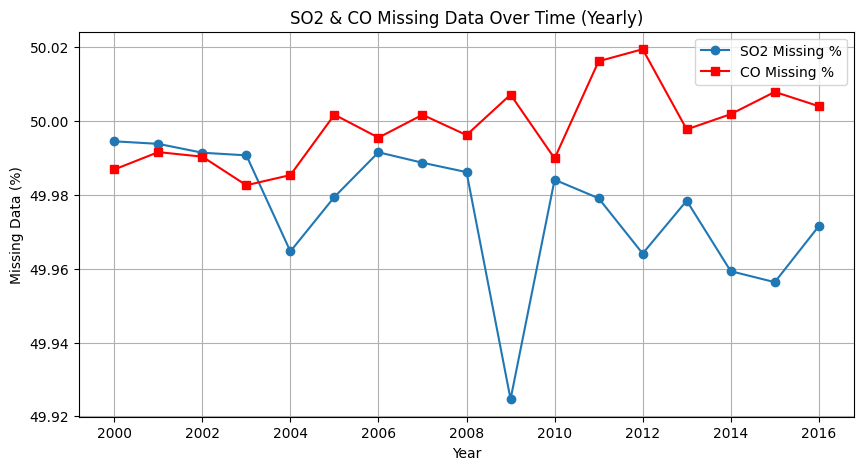

In [347]:
# Extract Year
pollution["Year"] = pd.to_datetime(pollution["Date Local"]).dt.year

# Calculate missing percentages per year
missing_so2_year = pollution["SO2 AQI"].isnull().groupby(pollution["Year"]).mean() * 100
missing_co_year = pollution["CO AQI"].isnull().groupby(pollution["Year"]).mean() * 100

# Plot missing data over time
plt.figure(figsize=(10,5))
plt.plot(missing_so2_year.index, missing_so2_year.values, marker="o", label="SO2 Missing %")
plt.plot(missing_co_year.index, missing_co_year.values, marker="s", label="CO Missing %", color="red")
plt.xlabel("Year")
plt.ylabel("Missing Data (%)")
plt.title("SO2 & CO Missing Data Over Time (Yearly)")
plt.legend()
plt.grid()
plt.show()


Consistently missing data, and 2009 is an anomaly, which must be investigated further. 

<Axes: xlabel='SO2 AQI', ylabel='NO2 AQI'>

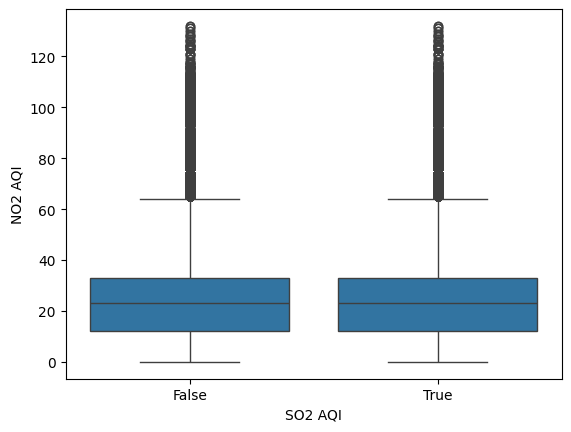

In [348]:
# Check if missing values depend on other factors
sns.boxplot(x=pollution["SO2 AQI"].isnull(), y=pollution["NO2 AQI"])

Missing data for CO2 and SO2 is not random, perhaps systematic because each state is missing between 49.02% to 50.02%

In [349]:
anomaly_year = 2009  # Investigating the anomaly to see why it had happened.
anomaly_check = pollution[pollution["Year"] == anomaly_year].isnull().mean() * 100
print(anomaly_check[["SO2 AQI", "CO AQI"]])


SO2 AQI    49.924646
CO AQI     50.007199
dtype: float64


Even though it is an anomaly year, its still close to the original values backing the point that the missing data pattern is systematic.

In [350]:
# Get missing percentage per station for the anomaly year
missing_by_station_anomaly = pollution[pollution["Year"] == anomaly_year].groupby("Site Num")[["SO2 AQI", "CO AQI"]].apply(lambda x: x.isnull().mean() * 100)

print(missing_by_station_anomaly.sort_values("SO2 AQI"))
# Checking which stations were affected

            SO2 AQI     CO AQI
Site Num                      
5005      48.222222  50.074074
1002      48.524845  50.000000
4003      49.793673  50.000000
1025      49.795362  50.000000
4         49.906933  50.023267
...             ...        ...
124       50.000000  50.000000
133       50.000000  50.000000
306       50.000000  50.000000
37        50.000000  50.000000
9997      50.000000  50.000000

[61 rows x 2 columns]


Now next steps can be =  exclude SO₂ and CO from your analysis and focus on pollutants with complete data

or Only analyze the rows where both SO₂ and CO have valid values but 50% missing values

or Replace missing SO₂ and CO values with the mean/median for that state or station

or Use time-based interpolation to estimate missing SO₂ and CO values based on nearby dates.

In [351]:
pollution[["CO AQI", "SO2 AQI"]].describe()
# checking for the values 

,CO AQI,SO2 AQI
count,873338.000000,873754.000000
mean,5.996595,7.115945
std,5.851836,11.937473
min,0.000000,0.000000
25%,2.000000,1.000000
50%,5.000000,3.000000
75%,8.000000,9.000000
max,201.000000,200.000000


In [352]:
zero_percent = (pollution[["CO AQI", "SO2 AQI"]] == 0).mean() * 100
print(zero_percent)
# checking what percentage of the aqi's are 0 if there are any

CO AQI      1.954816
SO2 AQI    10.987478
dtype: float64


In [353]:
zero_counts = (pollution[["CO AQI", "SO2 AQI"]] == 0).sum()
print(zero_counts)
# showing exactly how many times 0 appears for AQI's

CO AQI      34144
SO2 AQI    191914
dtype: int64


In [354]:
pollution.groupby("Year")[["CO AQI", "SO2 AQI"]].apply(lambda x: (x == 0).sum())
# checking for how many zero values there are per year

,CO AQI,SO2 AQI
Year,,
2000,1747,3051
2001,1950,3158
2002,2798,4873
2003,1942,4150
2004,1434,3253
2005,2775,3578
2006,2646,4343
2007,2985,5924
2008,2831,8143


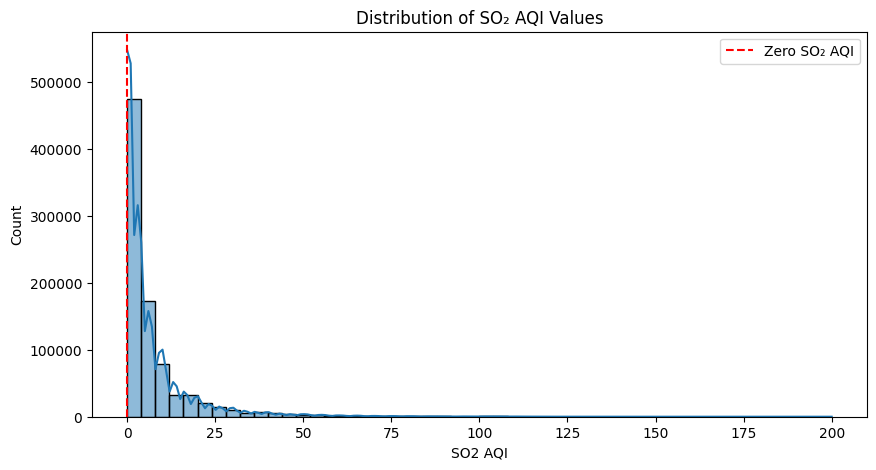

In [355]:
plt.figure(figsize=(10,5))
sns.histplot(pollution["SO2 AQI"], bins=50, kde=True)
plt.axvline(0, color="red", linestyle="dashed", label="Zero SO₂ AQI")
plt.legend()
plt.title("Distribution of SO₂ AQI Values")
plt.show()
# trying to see whether the zeros are missing data or valid data

A sudden spike at 0 suggests that some stations might have defaulted to 0 as SO₂ rarely stays exactly at 0 for extended periods across multiple locations, most likely the AQI of SO2 is not valid.

In [356]:
pollution["SO2 AQI"] = pollution["SO2 AQI"].replace(0, np.nan)
#  replace all SO₂ AQI = 0 values with NaN
# Avoids misleading statistics, ensures accurate missing data detection.

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
